In [1]:
import os
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np
import configs
import seaborn as sns
import pandas as pd

In [2]:
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn/'
checkpoints_dir = f'{engram_dir}checkpoints/'
tensorboard_dir = f'{engram_dir}tensorboard/'

In [3]:
plot_ci = True

# Separate Hyperparameters

In [4]:
lr = 0.01

In [14]:
tensorboard_dir = f'{engram_dir}tensorboard/randomInit_lr_0.01x/'

hyper_Babble8Spkr_snr-6.0


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


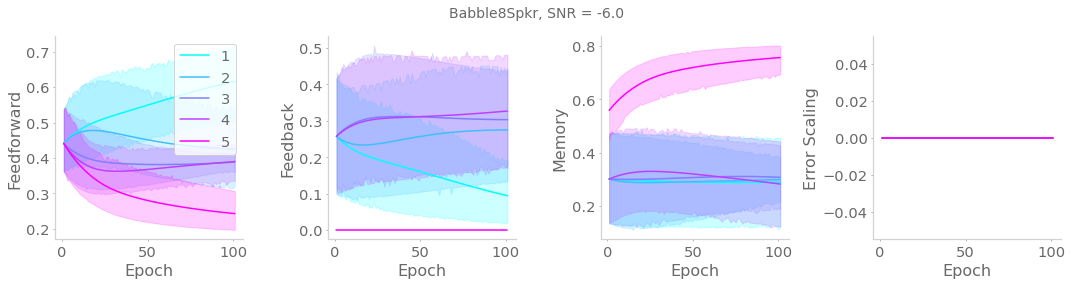




hyper_pinkNoise_snr3.0


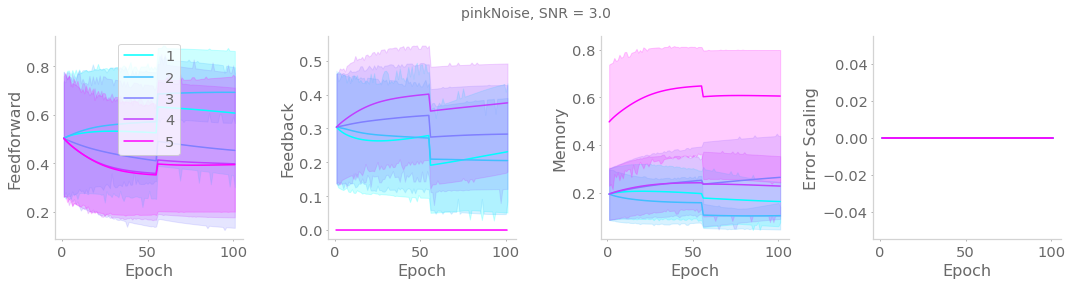




hyper_pinkNoise_snr-6.0


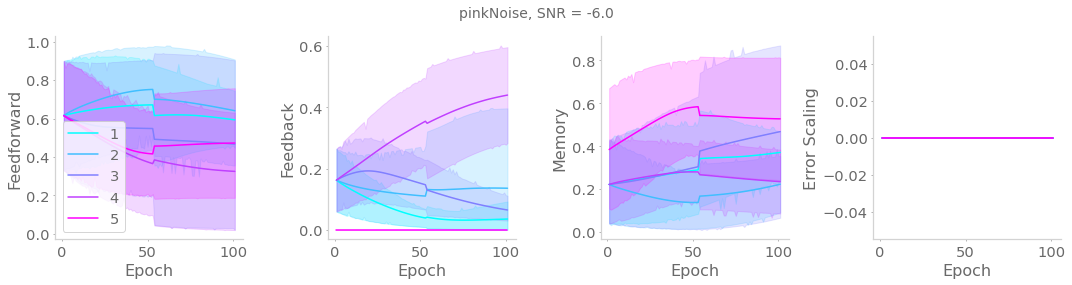




hyper_AudScene_snr-3.0


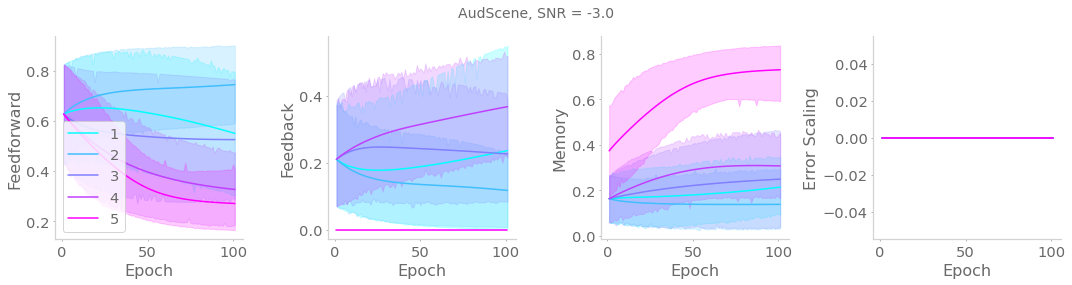




hyper_AudScene_snr0.0


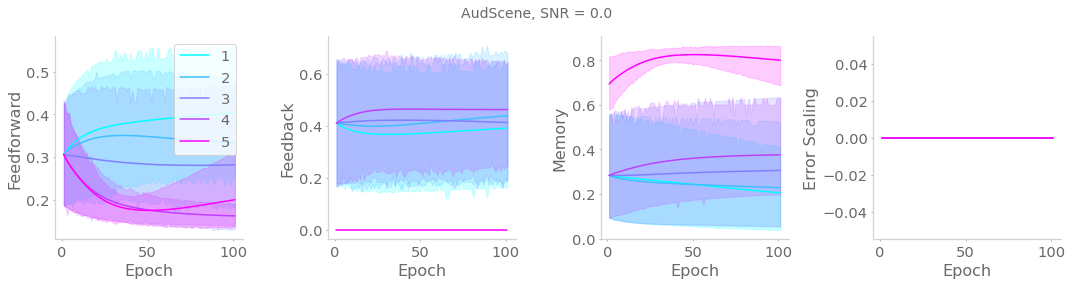




hyper_pinkNoise_snr-9.0


ValueError: All arrays must be of the same length

In [6]:
for tfdir in os.listdir(tensorboard_dir):
    if 'hyper' not in tfdir: continue
    if 'shared' in tfdir: continue
    if tfdir == 'small-hyper': continue
    print("====================")
    print(tfdir)
    print("====================")
    noise_info = tfdir.split('_')
    noise_snr = float(noise_info[-1][3:])
    noise_bg = noise_info[1]
    
    # Collect tensorboard files of interest
    tfdir = tensorboard_dir + tfdir + '/'
    tfdir_files = os.listdir(tfdir)
    if not plot_ci:
        if len(tfdir_files) > 1:
            print('More than one TF file; check it is correct.')
        tfdir_files = [tfdir_files[0]]
        
    # Collect hyperparameters
    feedforward = []
    feedback = []
    memory = []
    error_scaling = []
    layer = []
    epoch = []
    iteration = []
    
    for _iter, tfdir_file in enumerate(tfdir_files):
        tf_file = tfdir + tfdir_file
        ea = event_accumulator.EventAccumulator(tf_file)
        ea.Reload()
        for i in range(1, 6):
            try:
                _feedforward = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_feedforward")]
            except:
                continue
            _feedback = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_feedback")]
            _memory = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_memory")]
            _error_scaling = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_error")]
            feedforward.extend(_feedforward)
            feedback.extend(_feedback)
            memory.extend(_memory)
            error_scaling.extend(_error_scaling)
            layer.extend([i]*len(_feedforward))
            epoch.extend([e+1 for e in range(len(_feedforward))])
            iteration.extend([_iter]*len(_feedforward))

    # Make pandas dataframe
    df = pd.DataFrame({
        'Feedforward': feedforward,
        'Feedback': feedback,
        'Memory': memory,
        'Error Scaling': error_scaling,
        'Layer': layer,
        'Epoch': epoch,
        'Iteration': iteration
        })
    
    fig, axs = plt.subplots(1, 4, figsize = (15,4))
    colors = plt.cm.cool(np.linspace(0,1,5))
    for layer in range(1, 6):
        sns.lineplot(
            x='Epoch', y='Feedforward',
            color=colors[layer-1], ax=axs[0],
            data=df[df['Layer']==layer], label=layer
            )
        sns.lineplot(
            x='Epoch', y='Feedback',
            color=colors[layer-1], ax=axs[1],
            data=df[df['Layer']==layer]
            )
        sns.lineplot(
            x='Epoch', y='Memory',
            color=colors[layer-1], ax=axs[2],
            data=df[df['Layer']==layer]
            )
        sns.lineplot(
            x='Epoch', y='Error Scaling',
            color=colors[layer-1], ax=axs[3],
            data=df[df['Layer']==layer]
            )
    plt.suptitle(f'{noise_bg}, SNR = {noise_snr}', fontsize=14)
    plt.tight_layout()
    plt.show()
    print('\n\n')


In [15]:
# Collect hyperparameters
feedforward = []
feedback = []
memory = []
error_scaling = []
iteration = []
bg = []
snr = []
layers = []

for tfdir in os.listdir(tensorboard_dir):
    if 'hyper' not in tfdir: continue
    if 'shared' in tfdir: continue
    if tfdir == 'small-hyper': continue
    noise_info = tfdir.split('_')
    noise_snr = float(noise_info[-1][3:])
    noise_bg = noise_info[1]
    
    # Collect tensorboard files of interest
    tfdir = tensorboard_dir + tfdir + '/'
    tfdir_files = os.listdir(tfdir)
    if not plot_ci:
        if len(tfdir_files) > 1:
            print('More than one TF file; check it is correct.')
        tfdir_files = [tfdir_files[0]]
    
    for _iter, tfdir_file in enumerate(tfdir_files):
        tf_file = tfdir + tfdir_file
        ea = event_accumulator.EventAccumulator(tf_file)
        ea.Reload()
        try:
            _eval_acc = ea.Scalars(f'NoisyPerf/Epoch#80')[0].value
        except:
            continue

        for i in range(1, 6):
            _feedforward = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_feedforward")]
            _feedback = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_feedback")]
            _memory = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_memory")]
            _error_scaling = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_error")]

            if np.isnan(_feedforward[-1]): continue
            feedforward.append(_feedforward[-1])
            feedback.append(_feedback[-1])
            memory.append(_memory[-1])
            error_scaling.append(_error_scaling[-1])
            iteration.append(_iter)
            bg.append(noise_bg)
            snr.append(noise_snr)
            layers.append(i)
        print(f'{noise_bg}, {noise_snr}')

    # Make pandas dataframe
    df = pd.DataFrame({
        'Feedforward': feedforward,
        'Feedback': feedback,
        'Memory': memory,
        'Error Scaling': error_scaling,
        'Background Noise': bg,
        'SNR': snr, 
        'Layer': layers
        })


Babble8Spkr, -6.0
Babble8Spkr, -6.0
Babble8Spkr, -6.0
Babble8Spkr, -6.0
Babble8Spkr, -6.0
Babble8Spkr, -6.0
Babble8Spkr, -6.0
Babble8Spkr, -6.0
Babble8Spkr, -6.0
Babble8Spkr, -6.0
pinkNoise, 3.0
pinkNoise, 3.0
pinkNoise, 3.0
pinkNoise, 3.0
pinkNoise, 3.0
pinkNoise, 3.0
pinkNoise, 3.0
pinkNoise, 3.0
pinkNoise, 3.0
pinkNoise, -6.0
pinkNoise, -6.0
pinkNoise, -6.0
pinkNoise, -6.0
pinkNoise, -6.0
pinkNoise, -6.0
pinkNoise, -6.0
pinkNoise, -6.0
pinkNoise, -6.0
pinkNoise, -6.0
AudScene, -3.0
AudScene, -3.0
AudScene, -3.0
AudScene, -3.0
AudScene, -3.0
AudScene, -3.0
AudScene, -3.0
AudScene, -3.0
AudScene, -3.0
AudScene, -3.0
AudScene, 0.0
AudScene, 0.0
AudScene, 0.0
AudScene, 0.0
AudScene, 0.0
AudScene, 0.0
AudScene, 0.0
AudScene, 0.0
AudScene, 0.0
AudScene, 0.0
pinkNoise, -9.0
pinkNoise, -9.0
pinkNoise, -9.0
pinkNoise, -9.0
pinkNoise, -9.0
pinkNoise, -9.0
pinkNoise, -9.0
pinkNoise, -9.0
pinkNoise, -9.0
pinkNoise, 0.0
pinkNoise, 0.0
pinkNoise, 0.0
pinkNoise, 0.0
pinkNoise, 0.0
pinkNoise, 0.0
p

In [16]:
feedforward = np.array(feedforward)
feedback = np.array(feedback)
memory = np.array(memory)
error_scaling = np.array(error_scaling)
bg = np.array(bg)
snr = np.array(snr)
layers = np.array(layers)

In [17]:
_ff = []
_fb = []
_mem = []
_es = []
__bg = []
__snr = []
__l = []
for ff, fb, mem, es, _bg, _snr, _l in zip(feedforward, feedback, memory, error_scaling, bg, snr, layers):
    #idxs = np.logical_and(bg==_bg, snr==3.)
    #idxs = np.logical_and(idxs, layers==_l)
    _ff.append(ff) # - np.mean(feedforward[idxs]))
    _fb.append(fb) # - np.mean(feedback[idxs]))
    _mem.append(mem) # - np.mean(memory[idxs]))
    _es.append(es) # - np.mean(error_scaling[idxs]))
    __bg.append(_bg)
    __snr.append(_snr)
    __l.append(_l)

In [18]:
df = pd.DataFrame({
    'Feedforward': _ff,
    'Feedback': _fb,
    'Memory': _mem,
    'Error Scaling': _es,
    'Background Noise': __bg,
    'SNR': __snr, 
    'Layer': __l
    })

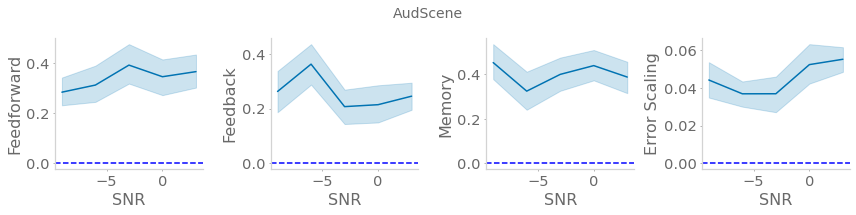

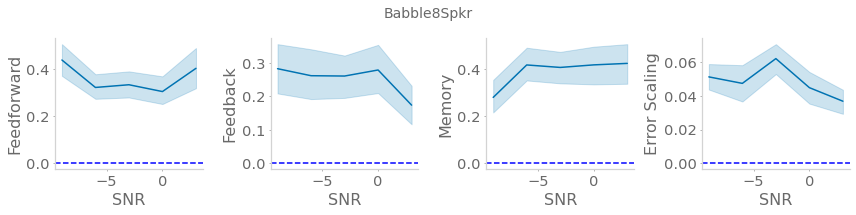

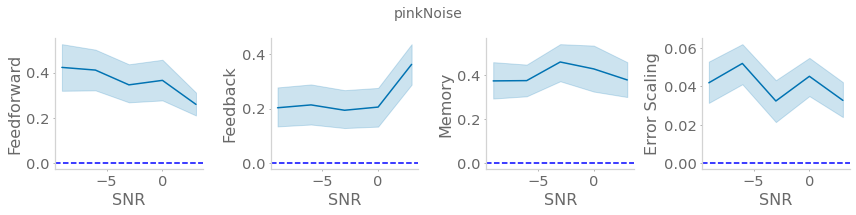

In [19]:
# COLLAPSED ACROSS LAYERS
for _bg in np.unique(bg):
    fig, axs = plt.subplots(1, 4, figsize = (12,3))
    sns.lineplot(
        x='SNR', y='Feedforward', #hue='Layer',
        ax=axs[0], data=df[df['Background Noise'] == _bg]
        )
    sns.lineplot(
        x='SNR', y='Feedback', #hue='Layer',
        ax=axs[1], data=df[df['Background Noise'] == _bg],
        legend=None
        )
    sns.lineplot(
        x='SNR', y='Memory', #hue='Layer',
        ax=axs[2], data=df[df['Background Noise'] == _bg],
        legend=None
        )
    sns.lineplot(
        x='SNR', y='Error Scaling', #hue='Layer',
        ax=axs[3], data=df[df['Background Noise'] == _bg],
        legend=None
        )
    for ax in axs:
        ax.axhline(0, color='blue', linestyle='--')
    plt.suptitle(f'{_bg}', fontsize=14)
    plt.tight_layout()
    plt.show()

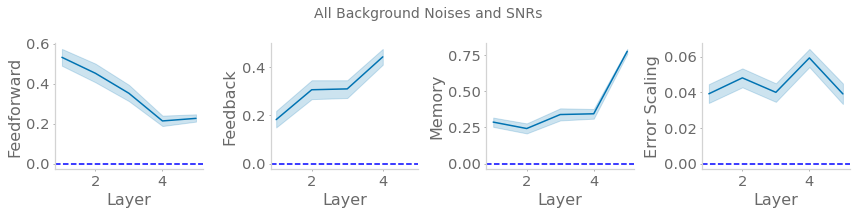

In [20]:
# COLLAPSED ACROSS SNR and bg
fig, axs = plt.subplots(1, 4, figsize = (12,3))
sns.lineplot(
    x='Layer', y='Feedforward', #hue='Layer',
    ax=axs[0], data=df
    )
sns.lineplot(
    x='Layer', y='Feedback', #hue='Layer',
    ax=axs[1], data=df[df['Layer']!=5],
    legend=None
    )
axs[1].set_xlim(right=5)
sns.lineplot(
    x='Layer', y='Memory', #hue='Layer',
    ax=axs[2], data=df,
    legend=None
    )
sns.lineplot(
    x='Layer', y='Error Scaling', #hue='Layer',
    ax=axs[3], data=df,
    legend=None
    )
for ax in axs:
    ax.axhline(0, color='blue', linestyle='--')
plt.suptitle(f'All Background Noises and SNRs', fontsize=14)
plt.tight_layout()
plt.show()
print('\n\n')

# Merged Hyperparameters

In [7]:
lr = 0.01

In [10]:
tensorboard_dir = f'{engram_dir}tensorboard/merged_lr{lr}x/'

hyper_merged


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


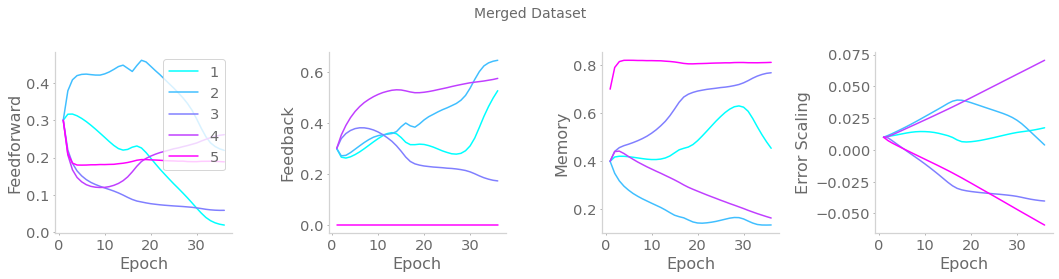

In [11]:
for tfdir in os.listdir(tensorboard_dir):
    if 'hyper' not in tfdir: continue
    if 'shared' in tfdir: continue
    if tfdir == 'small-hyper': continue
    print("====================")
    print(tfdir)
    print("====================")
    
    # Collect tensorboard files of interest
    tfdir = tensorboard_dir + tfdir + '/'
    tfdir_files = os.listdir(tfdir)
    if not plot_ci:
        if len(tfdir_files) > 1:
            print('More than one TF file; check it is correct.')
        tfdir_files = [tfdir_files[0]]
        
    # Collect hyperparameters
    feedforward = []
    feedback = []
    memory = []
    error_scaling = []
    layer = []
    epoch = []
    iteration = []
    
    for _iter, tfdir_file in enumerate(tfdir_files):
        tf_file = tfdir + tfdir_file
        ea = event_accumulator.EventAccumulator(tf_file)
        ea.Reload()
        for i in range(1, 6):
            try:
                _feedforward = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_feedforward")]
            except:
                continue
            _feedback = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_feedback")]
            _memory = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_memory")]
            _error_scaling = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_error")]
            feedforward.extend(_feedforward)
            feedback.extend(_feedback)
            memory.extend(_memory)
            error_scaling.extend(_error_scaling)
            layer.extend([i]*len(_feedforward))
            epoch.extend([e+1 for e in range(len(_feedforward))])
            iteration.extend([_iter]*len(_feedforward))

    # Make pandas dataframe
    df = pd.DataFrame({
        'Feedforward': feedforward,
        'Feedback': feedback,
        'Memory': memory,
        'Error Scaling': error_scaling,
        'Layer': layer,
        'Epoch': epoch,
        'Iteration': iteration
        })
    
    fig, axs = plt.subplots(1, 4, figsize = (15,4))
    colors = plt.cm.cool(np.linspace(0,1,5))
    for layer in range(1, 6):
        sns.lineplot(
            x='Epoch', y='Feedforward',
            color=colors[layer-1], ax=axs[0],
            data=df[df['Layer']==layer], label=layer
            )
        sns.lineplot(
            x='Epoch', y='Feedback',
            color=colors[layer-1], ax=axs[1],
            data=df[df['Layer']==layer]
            )
        sns.lineplot(
            x='Epoch', y='Memory',
            color=colors[layer-1], ax=axs[2],
            data=df[df['Layer']==layer]
            )
        sns.lineplot(
            x='Epoch', y='Error Scaling',
            color=colors[layer-1], ax=axs[3],
            data=df[df['Layer']==layer]
            )
    plt.suptitle(f'Merged Dataset', fontsize=14)
    plt.tight_layout()
    plt.show()
    print('\n\n')


In [13]:
# Collect hyperparameters
feedforward = []
feedback = []
memory = []
error_scaling = []
iteration = []
bg = []
snr = []
layers = []

for tfdir in os.listdir(tensorboard_dir):
    if 'hyper' not in tfdir: continue
    if 'shared' in tfdir: continue
    if tfdir == 'small-hyper': continue
    
    # Collect tensorboard files of interest
    tfdir = tensorboard_dir + tfdir + '/'
    tfdir_files = os.listdir(tfdir)
    if not plot_ci:
        if len(tfdir_files) > 1:
            print('More than one TF file; check it is correct.')
        tfdir_files = [tfdir_files[0]]
    
    for _iter, tfdir_file in enumerate(tfdir_files):
        tf_file = tfdir + tfdir_file
        ea = event_accumulator.EventAccumulator(tf_file)
        ea.Reload()
        try:
            _eval_acc = ea.Scalars(f'NoisyPerf/Epoch#60')[0].value
        except:
            continue

        for i in range(1, 6):
            _feedforward = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_feedforward")]
            _feedback = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_feedback")]
            _memory = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_memory")]
            _error_scaling = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_error")]

            feedforward.append(_feedforward[-1])
            feedback.append(_feedback[-1])
            memory.append(_memory[-1])
            error_scaling.append(_error_scaling[-1])
            iteration.append(_iter)
            layers.append(i)

    # Make pandas dataframe
    df = pd.DataFrame({
        'Feedforward': feedforward,
        'Feedback': feedback,
        'Memory': memory,
        'Error Scaling': error_scaling,
        'Layer': layers
        })


In [21]:
feedforward = np.array(feedforward)
feedback = np.array(feedback)
memory = np.array(memory)
error_scaling = np.array(error_scaling)
layers = np.array(layers)

In [22]:
df = pd.DataFrame({
    'Feedforward': feedforward,
    'Feedback': feedback,
    'Memory': memory,
    'Error Scaling': error_scaling,
    'Layer': layers
    })

In [15]:
_ff = []
_fb = []
_mem = []
_es = []
__l = []
for ff, fb, mem, es, _l in zip(feedforward, feedback, memory, error_scaling, layers):
    idxs = np.logical_and(bg==_bg, snr==3.)
    idxs = np.logical_and(idxs, layers==_l)
    _ff.append(ff - np.mean(feedforward[idxs]))
    _fb.append(fb - np.mean(feedback[idxs]))
    _mem.append(mem - np.mean(memory[idxs]))
    _es.append(es - np.mean(error_scaling[idxs]))
    __l.append(_l)

In [16]:
df = pd.DataFrame({
    'Feedforward': _ff,
    'Feedback': _fb,
    'Memory': _mem,
    'Error Scaling': _es,
    'Layer': __l
    })

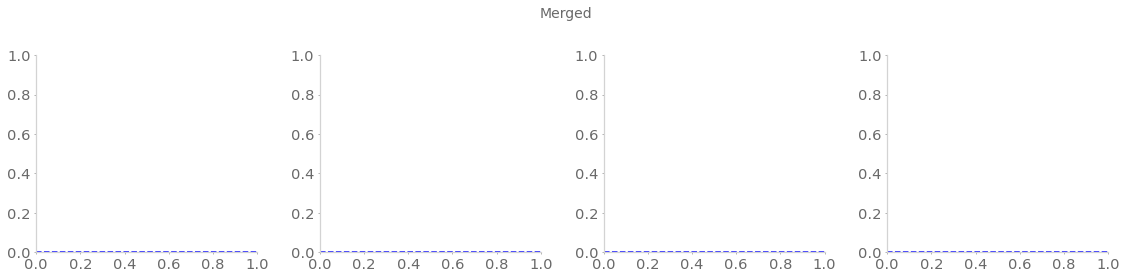

In [23]:
fig, axs = plt.subplots(1, 4, figsize = (16,4))
sns.lineplot(
    x='Layer', y='Feedforward',
    ax=axs[0], data=df,
    )
sns.lineplot(
    x='Layer', y='Feedback',
    ax=axs[1], data=df,
    legend=None
    )
sns.lineplot(
    x='Layer', y='Memory',
    ax=axs[2], data=df,
    legend=None
    )
sns.lineplot(
    x='Layer', y='Error Scaling',
    ax=axs[3], data=df,
    legend=None
    )
for ax in axs:
    ax.axhline(0, color='blue', linestyle='--')
plt.suptitle(f'Merged', fontsize=14)
plt.tight_layout()
plt.show()
print('\n\n')

# Shared Hyperparameters

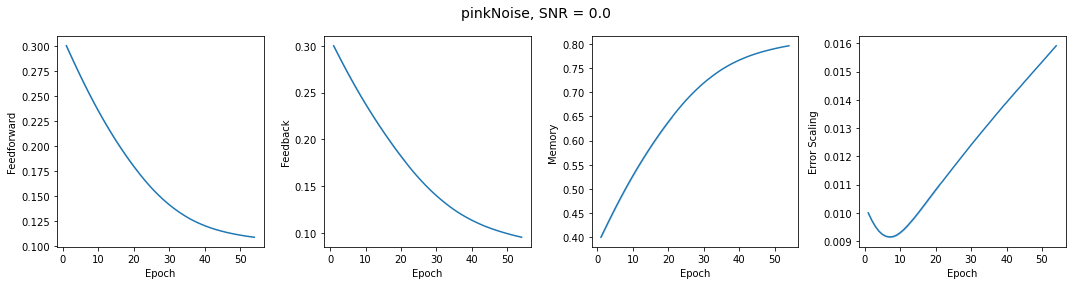

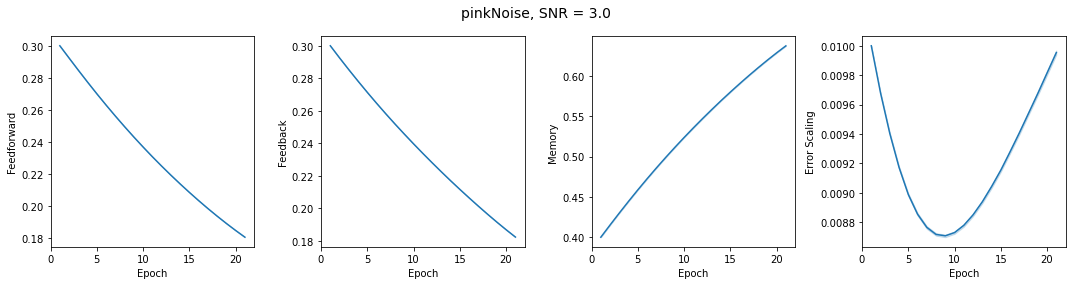

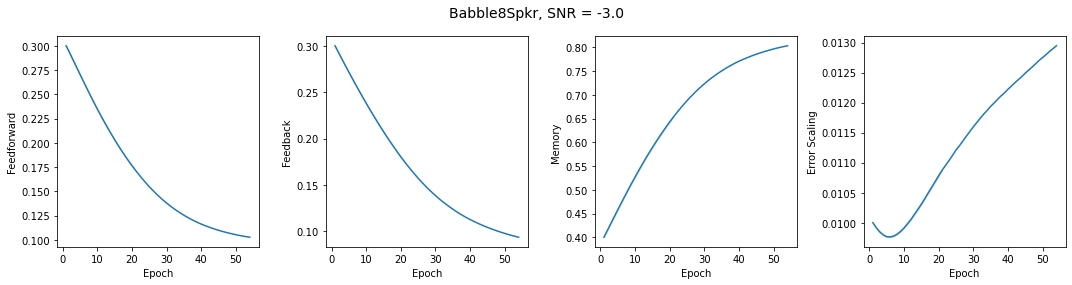

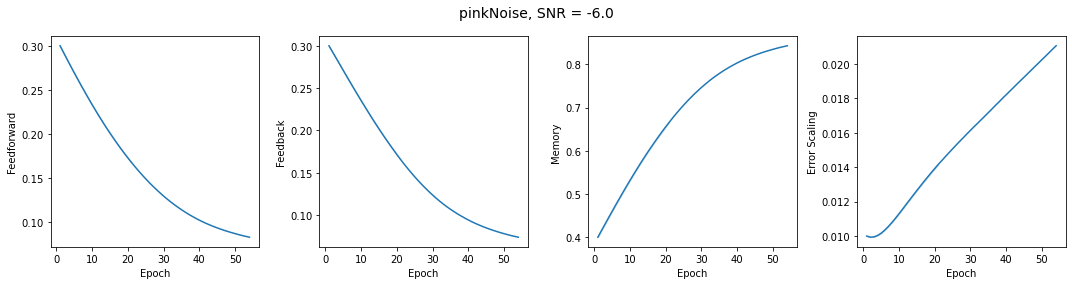

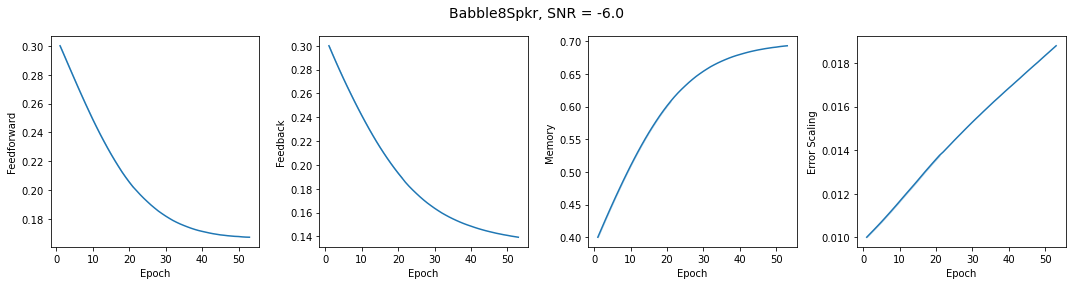

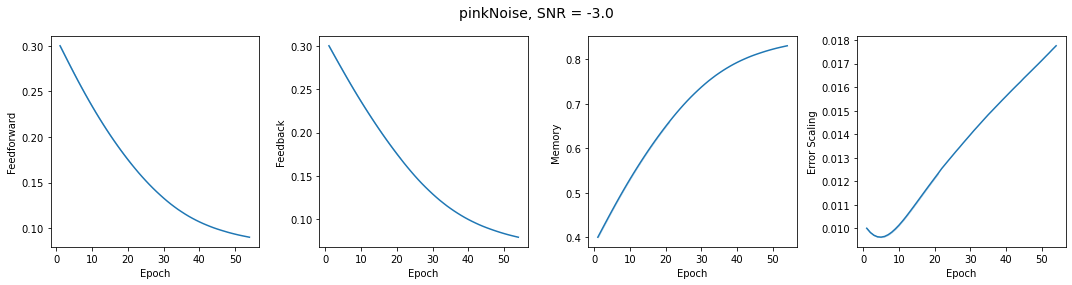

ValueError: arrays must all be same length

In [10]:
for tfdir in os.listdir(tensorboard_dir):
    if 'hyper' not in tfdir: continue
    if 'shared' not in tfdir: continue
    noise_info = tfdir.split('_')
    noise_snr = float(noise_info[-2][3:])
    noise_bg = noise_info[1]
    
    # Collect tensorboard files of interest
    tfdir = tensorboard_dir + tfdir + '/'
    tfdir_files = os.listdir(tfdir)
    if not plot_ci:
        if len(tfdir_files) > 1:
            print('More than one TF file; check it is correct.')
        tfdir_files = [tfdir_files[0]]
        
    # Collect hyperparameters
    feedforward = []
    feedback = []
    memory = []
    error_scaling = []
    epoch = []
    iteration = []
    
    for _iter, tfdir_file in enumerate(tfdir_files):
        tf_file = tfdir + tfdir_file
        ea = event_accumulator.EventAccumulator(tf_file)
        ea.Reload()
        try:
            _feedforward = [x.value for x in ea.Scalars(f"Hyperparam/feedforward")]
        except:
            continue
        _feedback = [x.value for x in ea.Scalars(f"Hyperparam/feedback")]
        _memory = [x.value for x in ea.Scalars(f"Hyperparam/memory")]
        _error_scaling = [x.value for x in ea.Scalars(f"Hyperparam/error")]
        feedforward.extend(_feedforward)
        feedback.extend(_feedback)
        memory.extend(_memory)
        error_scaling.extend(_error_scaling)
        epoch.extend([e+1 for e in range(len(_feedforward))])
        iteration.extend([_iter]*len(_feedforward))

    # Make pandas dataframe
    df = pd.DataFrame({
        'Feedforward': feedforward,
        'Feedback': feedback,
        'Memory': memory,
        'Error Scaling': error_scaling,
        'Epoch': epoch,
        'Iteration': iteration
        })
    
    fig, axs = plt.subplots(1, 4, figsize = (15,4))
    sns.lineplot(
        x='Epoch', y='Feedforward',
        ax=axs[0], data=df
        )
    sns.lineplot(
        x='Epoch', y='Feedback',
        ax=axs[1], data=df
        )
    sns.lineplot(
        x='Epoch', y='Memory',
        ax=axs[2], data=df
        )
    sns.lineplot(
        x='Epoch', y='Error Scaling',
        ax=axs[3], data=df
        )
    plt.suptitle(f'{noise_bg}, SNR = {noise_snr}', fontsize=14)
    plt.tight_layout()
    plt.show()
    print('\n\n')


In [ ]:
# Collect hyperparameters
feedforward = []
feedback = []
memory = []
error_scaling = []
iteration = []
bg = []
snr = []

for tfdir in os.listdir(tensorboard_dir):
    if 'hyper' not in tfdir: continue
    if 'shared' not in tfdir: continue
    noise_info = tfdir.split('_')
    noise_snr = float(noise_info[-2][3:])
    noise_bg = noise_info[1]
    
    # Collect tensorboard files of interest
    tfdir = tensorboard_dir + tfdir + '/'
    tfdir_files = os.listdir(tfdir)
    if not plot_ci:
        if len(tfdir_files) > 1:
            print('More than one TF file; check it is correct.')
        tfdir_files = [tfdir_files[0]]
    
    for _iter, tfdir_file in enumerate(tfdir_files):
        tf_file = tfdir + tfdir_file
        ea = event_accumulator.EventAccumulator(tf_file)
        ea.Reload()
        try:
            _feedforward = [x.value for x in ea.Scalars(f"Hyperparam/feedforward")]
        except:
            continue
        _feedback = [x.value for x in ea.Scalars(f"Hyperparam/feedback")]
        _memory = [x.value for x in ea.Scalars(f"Hyperparam/memory")]
        _error_scaling = [x.value for x in ea.Scalars(f"Hyperparam/error")]
        feedforward.append(_feedforward[-1])
        feedback.append(_feedback[-1])
        memory.append(_memory[-1])
        error_scaling.append(_error_scaling[-1])
        iteration.append(_iter)
        bg.append(noise_bg)
        snr.append(noise_snr)

    # Make pandas dataframe
    df = pd.DataFrame({
        'Feedforward': feedforward,
        'Feedback': feedback,
        'Memory': memory,
        'Error Scaling': error_scaling,
        'Background Noise': bg,
        'SNR': snr
        })


In [ ]:
for _bg in np.unique(bg):
    fig, axs = plt.subplots(1, 4, figsize = (15,4))
    sns.barplot(
        x='SNR', y='Feedforward',
        ax=axs[0], data=df[df['Background Noise'] == _bg]
        )
    sns.barplot(
        x='SNR', y='Feedback',
        ax=axs[1], data=df[df['Background Noise'] == _bg]
        )
    sns.barplot(
        x='SNR', y='Memory',
        ax=axs[2], data=df[df['Background Noise'] == _bg]
        )
    sns.barplot(
        x='SNR', y='Error Scaling',
        ax=axs[3], data=df[df['Background Noise'] == _bg]
        )
    plt.suptitle(f'{_bg}', fontsize=14)
    plt.tight_layout()
    plt.show()
    print('\n\n')